In [26]:
%load_ext autoreload
%autoreload 2
import litebird_sim as lbs
import numpy as np
import healpy as hp
import sbm
import logging
import toml
from pathlib import Path
import matplotlib.pyplot as plt
logging.basicConfig(level=logging.WARNING);

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
CONFIG_PATH = Path.home() / ".config" / "litebird_imo"
CONFIG_FILE_PATH = CONFIG_PATH / "imo.toml"
tomlinfo = toml.load(CONFIG_FILE_PATH)
flatfile_location = tomlinfo["repositories"][0]["location"]

imo = lbs.Imo(flatfile_location=flatfile_location)

In [28]:
channel = "H1-195"#sbm.channel_list[0]

config = sbm.Configlation(imo, channel)
config.mdim = 2
config.parallel = True
config.nside = 128
config.xlink_threshold = 0.7
config.use_hwp = False

syst = sbm.Systematics()
syst.sigma_gain_T = 0.1
syst.sigma_gain_B = 0.1

syst.sigma_rho_T = np.deg2rad(1/60)
syst.sigma_rho_B = 0.

syst.sigma_chi_T = 0.
syst.sigma_chi_B = 0.

Here, we will take a `N` realisations for CMB, systematics variations and noise.


In [29]:
N = 2
start_seed = 0
end_seed = start_seed + N
cmb_syst_seed_array = np.arange(start_seed, end_seed)
fg_models = ["pysm_dust_1", "pysm_synch_1"]

npix = hp.nside2npix(config.nside)
gain_maps = np.zeros([N,N,3,npix])
pointing_maps = np.zeros([N,N,3,npix])
noise_maps = np.zeros([N,3,npix])

lmax = 3*config.nside-1
delta_cl_gain = np.zeros([N,N,6,lmax+1])
delta_cl_pointing = np.zeros([N,N,6,lmax+1])
cl_noise = np.zeros([N,6,lmax+1])

for i,cmb_seed in enumerate(cmb_syst_seed_array):
    Mbsparams = lbs.MbsParameters(
        make_cmb=True,
        cmb_r=0.001,
        make_fg=True,
        seed_cmb=cmb_seed,
        fg_models=fg_models,
        gaussian_smooth=False,
        bandpass_int=False,
        nside=config.nside,
        units="uK_CMB",
        maps_in_ecliptic=False,
    )
    noise_seed = cmb_seed
    syst.noise_seed = noise_seed
    for j,syst_seed in enumerate(cmb_syst_seed_array):
        syst.syst_seed = syst_seed
        print(f"CMB seed: {cmb_seed} | Noise seed {noise_seed} | Syst. seed: {syst_seed}")
        gain_map, input_maps = sbm.sim_diff_gain_per_ch(config, syst, Mbsparams)
        pointing_map, input_maps = sbm.sim_diff_pointing_per_ch(config, syst, Mbsparams)
        noise_map = sbm.sim_noise_per_ch(config, syst)
        gain_maps[i,j] = gain_map
        pointing_maps[i,j] = pointing_map

        input_map = (input_maps["cmb"] + input_maps["fg"][fg_models[0]] + input_maps["fg"][fg_models[1]])[0]
        delta_cl_gain[i,j] = hp.anafast(gain_map-input_map)
        delta_cl_pointing[i,j] = hp.anafast(pointing_map-input_map)
        if j == 0:
            noise_maps[i] = noise_map
            cl_noise[i] = hp.anafast(noise_map)

CMB seed: 0 | Noise seed 0 | Syst. seed: 0


Processing H1-195:   0%|          | 0/127 [00:00<?, ?it/s]

HWP off
HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP off
HWP off
HWP offHWP off

HWP offHWP off

HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP offHWP off

HWP off
HWP offHWP off

HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP offHWP off



Processing H1-195:   0%|          | 0/127 [00:00<?, ?it/s]

HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP offHWP off

HWP offHWP off

HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP off
HWP offHWP off

HWP off
HWP off
HWP off
HWP offHWP off



Processing H1-195:   1%|          | 1/127 [00:01<03:57,  1.88s/it]

HWP offHWP off

HWP off
HWP off
HWP off


Processing H1-195:   5%|▍         | 6/127 [00:02<00:32,  3.73it/s]

HWP off
HWP off
HWP off


Processing H1-195:   7%|▋         | 9/127 [00:02<00:28,  4.12it/s]

HWP off
HWP off


KeyboardInterrupt: 

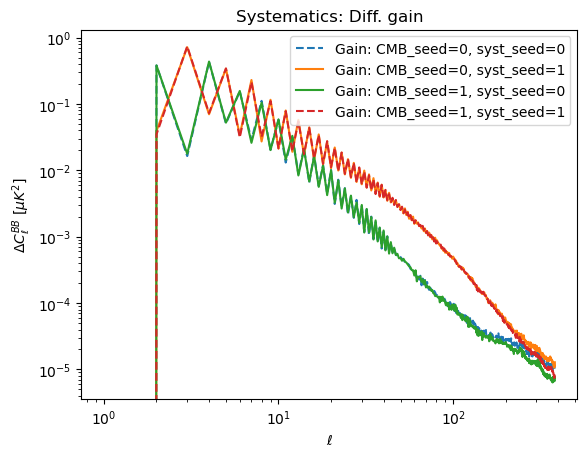

In [15]:
for i,cmb_seed in enumerate(cmb_syst_seed_array):
    for j,syst_seed in enumerate(cmb_syst_seed_array):
        if i != j:
            line = "-"
        else:
            line = "--"
        plt.loglog(delta_cl_gain[i,j,2,:], line, label=f"Gain: CMB_seed={cmb_seed}, syst_seed={syst_seed}")
plt.title("Systematics: Diff. gain")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\Delta C_\ell^{BB}$ [$\mu K^2$]")
plt.legend()

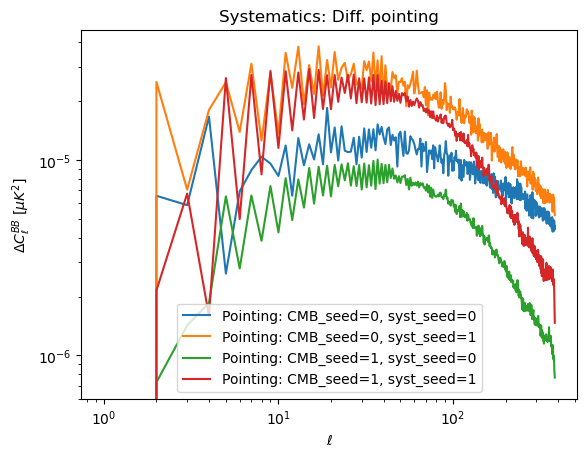

In [16]:
for i in range(N):
    for j in range(N):
        plt.loglog(delta_cl_pointing[i,j,2,:], label=f"Pointing: CMB_seed={i}, syst_seed={j}")
plt.title("Systematics: Diff. pointing")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\Delta C_\ell^{BB}$ [$\mu K^2$]")
plt.legend()

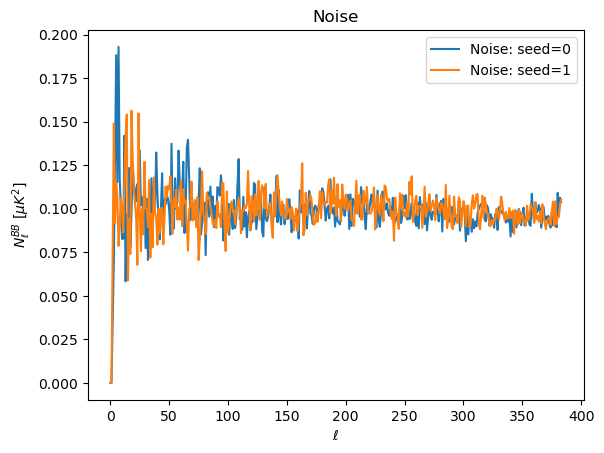

In [17]:
for i in range(N):
    plt.plot(cl_noise[i,2 ,:], "-", label=f"Noise: seed={i}")
plt.title("Noise")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$N_\ell^{BB}$ [$\mu K^2$]")
plt.legend()